**PROJECT OBJECTIVE:** University’s management require an automation which can create a classifier capable of determining a plant's species from a photo

*italicized text*

**Steps and tasks: [ Total Score: 20 points]**
1. Import the data. Analyse the dimensions of the data. Visualise the data.
2. Train tune and test AIML image classifier model using:
• Use supervised learning algorithms for training
• Use neural networks for training
• Use CNN for training
3. Compare the results from the above step along with your detailed observations.
4. Pickle the best performing model.
5. Import the the image in the “ Prediction” folder to predict the class. Display the image. Use the best trained image
classifier model to predict the class.

In [1]:
from google.colab import drive
import tensorflow as tf
import numpy as np
import os
import pickle

In [2]:
drive.mount('/content/drive/')

Mounted at /content/drive/


In [3]:
project_path = '/content/drive/MyDrive/Colab Notebooks/Project-CNN'
train_path = '/content/drive/MyDrive/Colab Notebooks/Project-CNN/train'
test_path = '/content/drive/MyDrive/Colab Notebooks/Project-CNN/test'

In [4]:
# listing the project directory
!ls '/content/drive/MyDrive/Colab Notebooks/Project-CNN'

 Backup
 CNN_Project1_Auto_Classification.ipynb
'CNN - Project 1.pdf'
 CNN_Project1_PlantSeeds_ImageClassification_SL_NN_CNN_Models.ipynb
 ImageClassification_SL-Main.ipynb
 model.sav
 plant_seedings_CNN.h5
 plant_seedings.h5
 sample_submission.csv
 seeds_v1.h5
 submission.csv
 test
 test.pickle
 train
 train_auto
 train.pickle


In [5]:
#initialize Train, Test and Labels for Image classification
trainX = []
testX = []
categories = []

In [6]:
# change directory to train_path
os.chdir(train_path)

In [7]:
categories = os.listdir(train_path)
print(categories)

['Black-grass', 'Charlock', 'Cleavers', 'Common Chickweed', 'Fat Hen', 'Common wheat', 'Loose Silky-bent', 'Sugar beet', 'Maize', 'Small-flowered Cranesbill', 'Shepherds Purse', 'Scentless Mayweed']


In [8]:
# Loding images from Train - Run only once as pickle file is dumped with the train images for further modeling
import cv2
img_size = 128
for i in os.listdir():
  print(i)
  for j in os.listdir(i):
    temp = cv2.imread(train_path + '/' + i + '/' + j)
    temp = cv2.resize(temp, (img_size, img_size))
    trainimage = np.array(temp).flatten()
    trainX.append([trainimage, i])

Black-grass
Charlock
Cleavers
Common Chickweed
Fat Hen
Common wheat
Loose Silky-bent
Sugar beet
Maize
Small-flowered Cranesbill
Shepherds Purse
Scentless Mayweed


In [9]:
os.chdir(project_path)
os.listdir(project_path)
pick_train = open('train.pickle', 'wb')
pickle.dump(trainX, pick_train)
pick_train.close()

In [10]:
# Loding images from Test - Run only once as pickle file is dumped with the test images for further modeling
os.chdir(test_path)
os.listdir(test_path)
import cv2
for i in os.listdir():
  temp = cv2.imread(test_path + '/' + i)
  temp = cv2.resize(temp, (img_size, img_size))
  testimage = np.array(temp).flatten()
  testX.append([testimage, i])

In [11]:
os.chdir(project_path)
os.listdir(project_path)
pick_test = open('test.pickle', 'wb')
pickle.dump(testX, pick_test)
pick_test.close()

In [12]:
# Changing directory path to project folder
os.chdir(project_path)
os.listdir(project_path)

['sample_submission.csv',
 'CNN - Project 1.pdf',
 'train',
 'test',
 'ImageClassification_SL-Main.ipynb',
 'Backup',
 'train_auto',
 'plant_seedings.h5',
 'CNN_Project1_Auto_Classification.ipynb',
 'train.pickle',
 'test.pickle',
 'model.sav',
 'seeds_v1.h5',
 'plant_seedings_CNN.h5',
 'submission.csv',
 'CNN_Project1_PlantSeeds_ImageClassification_SL_NN_CNN_Models.ipynb']

In [13]:
pick_train = open('train.pickle', 'rb')
trainX = pickle.load(pick_train)
pick_train.close()

In [14]:
trainX

[[array([24, 47, 77, ..., 64, 58, 62], dtype=uint8), 'Black-grass'],
 [array([ 51,  84, 108, ...,  72,  83,  98], dtype=uint8), 'Black-grass'],
 [array([42, 48, 56, ..., 58, 75, 94], dtype=uint8), 'Black-grass'],
 [array([ 22,  29,  49, ..., 103,  99, 103], dtype=uint8), 'Black-grass'],
 [array([ 81, 100, 113, ...,  66,  77,  86], dtype=uint8), 'Black-grass'],
 [array([143, 144, 148, ...,  47,  66,  83], dtype=uint8), 'Black-grass'],
 [array([167, 164, 164, ...,  29,  44,  58], dtype=uint8), 'Black-grass'],
 [array([26, 47, 60, ..., 51, 67, 79], dtype=uint8), 'Black-grass'],
 [array([44, 65, 62, ..., 50, 52, 53], dtype=uint8), 'Black-grass'],
 [array([139, 139, 136, ..., 187, 180, 180], dtype=uint8), 'Black-grass'],
 [array([41, 64, 86, ..., 40, 39, 49], dtype=uint8), 'Black-grass'],
 [array([18, 40, 67, ..., 35, 34, 43], dtype=uint8), 'Black-grass'],
 [array([ 45,  46,  49, ..., 176, 175, 176], dtype=uint8), 'Black-grass'],
 [array([190, 189, 189, ...,  78,  97, 110], dtype=uint8), 'B

In [15]:
pick_test = open('test.pickle', 'rb')
testX = pickle.load(pick_test)
pick_test.close()

In [16]:
trainX = np.array(trainX)
testX = np.array(testX)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  


In [17]:
import random
random.shuffle(trainX)
features =[]
test_features = []
labels = []
filenames = []

In [18]:
for feature, label in trainX:
  features.append(feature)
  labels.append(label)

In [19]:
for feature, filename in testX:
  test_features.append(feature)
  filenames.append(filename)

In [20]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(features,labels, test_size = 0.2)

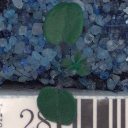

In [21]:
#Use array_to_img function to convert numpy array to image - Visualizing Train Image
new_image = tf.keras.preprocessing.image.array_to_img(xtrain[0].reshape(128,128,3))
#Show image
new_image

In [22]:
ytrain[0]

'Cleavers'

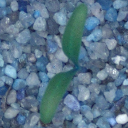

In [23]:
#Use array_to_img function to convert numpy array to image - Visualizing Test Image
new_image = tf.keras.preprocessing.image.array_to_img(test_features[0].reshape(128,128,3))

#Show image
new_image

In [24]:
from sklearn.svm import SVC
model = SVC(C=1, kernel = 'poly', gamma = 'auto')
model.fit(xtrain, ytrain)

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [25]:
pick_model = open("model.sav", "wb")
pickle.dump(model,pick_model)
pick_model.close()

In [26]:
pick_model = open('model.sav', 'rb')
model = pickle.load(pick_model)
pick_model.close()

In [27]:
y_pred = model.predict(xtest)

In [28]:
acc = model.score(xtest,ytest)
print("Accuracy :", acc)

Accuracy : 0.8326315789473684


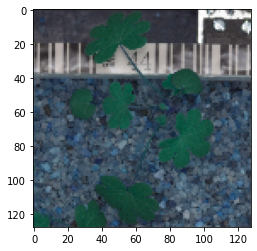

In [29]:
# Visualizing the validation Image
import matplotlib.pyplot as plt
seedimage = xtest[0].reshape(128,128,3)
plt.imshow(seedimage)
plt.show()

In [30]:
# Actual Image and Predicted Validation image
print('Actual:', ytest[0])
print('Predicted:', y_pred[0])

Actual: Small-flowered Cranesbill
Predicted: Black-grass


In [31]:
xtest[0]

array([47, 47, 58, ..., 43, 58, 73], dtype=uint8)

In [32]:
test_features[0]

array([ 78, 111, 132, ...,  38,  47,  67], dtype=uint8)

In [33]:
# predicting the test images using SVC model
y_true = model.predict(test_features)

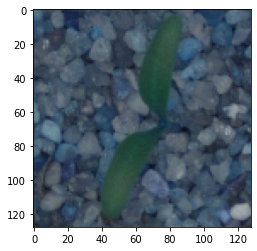

In [34]:
# Visualizing the actual test Image
import matplotlib.pyplot as plt
seedimage = test_features[0].reshape(128,128,3)
plt.imshow(seedimage)
plt.show()

In [35]:
# Predicted test image label
print("Plant Seed with file name {} belongs to class {} ".format(filenames[0], y_true[0]))

Plant Seed with file name 007b3da8b.png belongs to class Fat Hen 


In [36]:
# Neural Networks - Image Classification

In [37]:
# Label Encoding the Classes for Deep Neural Networks
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
categories = le.fit_transform(labels)

Label:  Black-grass


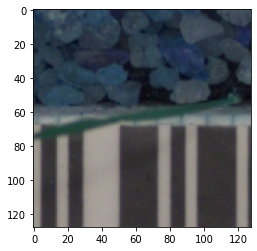

In [38]:
# Visualizing the Test Image
import matplotlib.pyplot as plt
seedimage = features[0].reshape(128,128,3)
plt.imshow(seedimage)
print('Label: ', labels[0])
plt.show()

In [39]:
np.asarray(features).shape

(4750, 49152)

In [40]:
np.asarray(categories).shape

(4750,)

In [41]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(features,categories, test_size = 0.2)

In [42]:
X_train = np.array(X_train)
X_test = np.array(X_test)

In [43]:
import tensorflow as tf
y_train = tf.keras.utils.to_categorical(y_train, num_classes=12)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=12)

In [44]:
X_train.shape

(3800, 49152)

In [45]:
y_train.shape

(3800, 12)

In [46]:
X_test.shape

(950, 49152)

In [47]:
y_test.shape

(950, 12)

In [48]:
from keras.layers import Dense, Activation
#Initialize Sequential model
tf.keras.backend.clear_session()

model2 = tf.keras.models.Sequential()

#Reshape data from 3D to 1D -> 128X128X3 to 49152
model2.add(tf.keras.layers.Reshape((49152,),input_shape=(128,128,3,)))

#Normalize the data
model2.add(tf.keras.layers.BatchNormalization())

In [49]:
# 1st Hidden layer
model2.add(tf.keras.layers.Dense(360, activation='relu'))
# 2nd Hidden layer
model2.add(tf.keras.layers.BatchNormalization())
model2.add(tf.keras.layers.Dense(180, activation='relu'))
model2.add(tf.keras.layers.Dropout(0.25))
'''# 3rd Hidden layer
model2.add(tf.keras.layers.BatchNormalization())
model2.add(tf.keras.layers.Dense(64, activation='relu'))
model2.add(tf.keras.layers.Dropout(0.3))'''

"# 3rd Hidden layer\nmodel2.add(tf.keras.layers.BatchNormalization())\nmodel2.add(tf.keras.layers.Dense(64, activation='relu'))\nmodel2.add(tf.keras.layers.Dropout(0.3))"

In [50]:
#Add OUTPUT layer
model2.add(tf.keras.layers.Dense(12, activation='softmax'))

In [51]:
#Compile the model
model2.compile( optimizer='adam', loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [52]:
# saving the best model using checkpoint in a file
model_checkpoint = tf.keras.callbacks.ModelCheckpoint('seeds_v1.h5', save_best_only=True, monitor='val_accuracy', mode='max', verbose=1)

In [53]:
model2.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape (Reshape)            (None, 49152)             0         
_________________________________________________________________
batch_normalization (BatchNo (None, 49152)             196608    
_________________________________________________________________
dense (Dense)                (None, 360)               17695080  
_________________________________________________________________
batch_normalization_1 (Batch (None, 360)               1440      
_________________________________________________________________
dense_1 (Dense)              (None, 180)               64980     
_________________________________________________________________
dropout (Dropout)            (None, 180)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 12)                2

In [54]:
model2.fit(X_train,y_train,          
          epochs=50,
          validation_data = (X_test, y_test),
          batch_size=32, 
          callbacks=[model_checkpoint])

Epoch 1/50
119/119 [==============================] - 5s 20ms/step - loss: 1.8739 - accuracy: 0.4617 - val_loss: 2.4035 - val_accuracy: 0.4421

Epoch 00001: val_accuracy improved from -inf to 0.44211, saving model to seeds_v1.h5
Epoch 2/50
119/119 [==============================] - 2s 16ms/step - loss: 0.7509 - accuracy: 0.7689 - val_loss: 0.6908 - val_accuracy: 0.8158

Epoch 00002: val_accuracy improved from 0.44211 to 0.81579, saving model to seeds_v1.h5
Epoch 3/50
119/119 [==============================] - 2s 16ms/step - loss: 0.3805 - accuracy: 0.8859 - val_loss: 0.5826 - val_accuracy: 0.8379

Epoch 00003: val_accuracy improved from 0.81579 to 0.83789, saving model to seeds_v1.h5
Epoch 4/50
119/119 [==============================] - 2s 15ms/step - loss: 0.2946 - accuracy: 0.9172 - val_loss: 0.5419 - val_accuracy: 0.8568

Epoch 00004: val_accuracy improved from 0.83789 to 0.85684, saving model to seeds_v1.h5
Epoch 5/50
119/119 [==============================] - 2s 15ms/step - loss: 

Prediction label 0
Actual Label 0


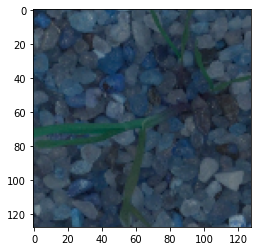

In [55]:
img_num = np.random.randint(0,X_test.shape[0])
input_data = np.expand_dims(X_test[img_num], axis=0)
pred = model2.predict(input_data)
print('Prediction label', np.argmax(pred[0]))
print('Actual Label', np.argmax(y_test[img_num]))
plt.imshow(X_test[img_num].reshape(128,128,3))
plt.show()

In [56]:
import keras.models
from keras.models import load_model
model = keras.models.load_model('seeds_v1.h5')

Prediction label : 4
Filename : 007b3da8b.png


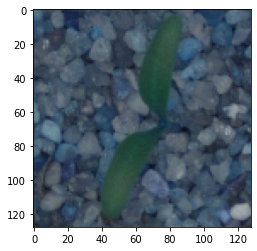

In [57]:
pred = model.predict(np.asarray(test_features))
print('Prediction label :', np.argmax(pred[0]))
print('Filename :', filenames[0] )
plt.imshow(test_features[0].reshape(128,128,3))
plt.show()

In [58]:
# CNN Model

In [59]:
#Define some parameters
img_size = 128
img_depth = 3
batch_size = 32

In [60]:
!ls '/content/drive/MyDrive/Colab Notebooks/Project-CNN/train'

 Black-grass	    'Common wheat'	'Scentless Mayweed'
 Charlock	    'Fat Hen'		'Shepherds Purse'
 Cleavers	    'Loose Silky-bent'	'Small-flowered Cranesbill'
'Common Chickweed'   Maize		'Sugar beet'


In [61]:
#ImageDataGenerator declaration with 20% data as test (80% for training)
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator

In [62]:
# using Image Generator with scaling, image aumentation features
image_datagenerator = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    validation_split=0.2
)

In [63]:
features = np.array(features)
labels = np.array(labels)

In [64]:
X_train2 = features.reshape(features.shape[0], img_size, img_size, img_depth)
X_train2.shape

(4750, 128, 128, 3)

In [65]:
# Label Encoding the Classes
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
categories = le.fit_transform(labels)

In [66]:
y_train2 = tf.keras.utils.to_categorical(categories, num_classes=12)
y_train2.shape

(4750, 12)

In [67]:
image_datagenerator.fit(X_train2)

In [68]:
from sklearn.model_selection import train_test_split
X_train3,X_test3,y_train3,y_test3 = train_test_split(X_train2,y_train2, test_size = 0.2)

In [69]:
X_train3.shape

(3800, 128, 128, 3)

In [70]:
X_test3.shape

(950, 128, 128, 3)

In [71]:
y_train3.shape

(3800, 12)

In [72]:
y_test3.shape

(950, 12)

In [73]:
# CNN Model

#Clear any previous model from memory
tf.keras.backend.clear_session()

#Initialize model
model3 = tf.keras.models.Sequential()

#normalize data
model3.add(tf.keras.layers.InputLayer(input_shape=(img_size,img_size,img_depth,)))
model3.add(tf.keras.layers.BatchNormalization())

#Add 1st Conv Layer
model3.add(tf.keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu'))
model3.add(tf.keras.layers.MaxPool2D(pool_size = (2,2)))

#BatchNormalization Layer
model3.add(tf.keras.layers.BatchNormalization())

#Add 2nd Conv Layer
model3.add(tf.keras.layers.Conv2D(64, kernel_size=(4,4), activation='relu'))
model3.add(tf.keras.layers.MaxPool2D(pool_size = (2,2)))

#Add 3rd Conv Layer
model3.add(tf.keras.layers.Conv2D(128, kernel_size=(3,3), padding='same', activation='relu'))
#Add Max Pool layer
model3.add(tf.keras.layers.MaxPool2D(pool_size = (2,2)))

#Add 4th Conv Layer
model3.add(tf.keras.layers.Conv2D(128, kernel_size=(3,3), padding='same', activation='relu'))
#Add Max Pool layer
model3.add(tf.keras.layers.MaxPool2D(pool_size = (2,2)))

#BatchNormalization Layer
model3.add(tf.keras.layers.BatchNormalization())

#Add Dense Layers after flattening the data
model3.add(tf.keras.layers.Flatten())
model3.add(tf.keras.layers.Dense(128, activation='relu'))
model3.add(tf.keras.layers.Dense(64, activation='relu'))

#Add Dropout
model3.add(tf.keras.layers.Dropout(0.3))

model3.add(tf.keras.layers.Dense(32, activation='relu'))
model3.add(tf.keras.layers.Dropout(0.3))

#Add Output Layer
model3.add(tf.keras.layers.Dense(12, activation='softmax'))

In [74]:
#Specify Loass and Optimizer
model3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [75]:
#Model Summary
model3.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization (BatchNo (None, 128, 128, 3)       12        
_________________________________________________________________
conv2d (Conv2D)              (None, 126, 126, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 63, 63, 32)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 63, 63, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 60, 60, 64)        32832     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 30, 30, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 30, 30, 128)       7

In [76]:
#Saving the best model using model checkpoint callback
model_checkpoint=tf.keras.callbacks.ModelCheckpoint('plant_seedings_CNN.h5', #where to save the model
                                                    save_best_only=True, 
                                                    monitor='val_accuracy', 
                                                    mode='max', 
                                                    verbose = 1)

In [82]:
model3.fit(X_train3,y_train3,
          epochs=50,
          #steps_per_epoch= 3803//batch_size,  #Number of batches per epoch
          validation_data=(X_test3, y_test3),
          #validation_steps = 947//batch_size, #Number of test images//batch_size
          callbacks=[model_checkpoint], 
          verbose = 1) 

Epoch 1/50
119/119 [==============================] - 6s 49ms/step - loss: 0.2990 - accuracy: 0.9016 - val_loss: 0.4643 - val_accuracy: 0.8800

Epoch 00001: val_accuracy did not improve from 0.91684
Epoch 2/50
119/119 [==============================] - 6s 47ms/step - loss: 0.2363 - accuracy: 0.9258 - val_loss: 0.3056 - val_accuracy: 0.9263

Epoch 00002: val_accuracy improved from 0.91684 to 0.92632, saving model to plant_seedings_CNN.h5
Epoch 3/50
119/119 [==============================] - 6s 47ms/step - loss: 0.1791 - accuracy: 0.9416 - val_loss: 0.4393 - val_accuracy: 0.8968

Epoch 00003: val_accuracy did not improve from 0.92632
Epoch 4/50
119/119 [==============================] - 6s 47ms/step - loss: 0.1552 - accuracy: 0.9489 - val_loss: 0.3213 - val_accuracy: 0.9221

Epoch 00004: val_accuracy did not improve from 0.92632
Epoch 5/50
119/119 [==============================] - 6s 47ms/step - loss: 0.1736 - accuracy: 0.9516 - val_loss: 0.6876 - val_accuracy: 0.8853

Epoch 00005: val_

Prediction label 3
Actual Label 3


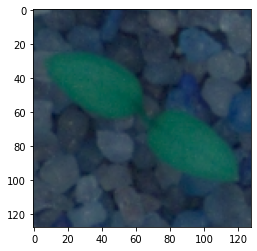

In [78]:
img_num = np.random.randint(0,X_test3.shape[0])
input_data = np.expand_dims(X_test3[img_num], axis=0)
pred = model3.predict(input_data)
print('Prediction label', np.argmax(pred[0]))
print('Actual Label', np.argmax(y_test3[img_num]))
plt.imshow(X_test3[img_num].reshape(128,128,3))
plt.show()

In [79]:
def create_test_data(test_images_dir, image_size):
    filenames = []
    test_X = []
    for img_file in os.listdir(test_images_dir):
        filenames.append(img_file)
        img = tf.keras.preprocessing.image.load_img(test_images_dir + '/' + img_file)
        img_new = img.resize([image_size, image_size])
        img_array = tf.keras.preprocessing.image.img_to_array(img_new)
        img_array = img_array * 1./255
        test_X.append(img_array)
    test_X = np.array(test_X,dtype=np.float32)
    return test_X, filenames 

In [80]:
test_X, filenames  = create_test_data('/content/drive/MyDrive/Colab Notebooks/Project-CNN/test',img_size)
test_X[0].shape

(128, 128, 3)

In [81]:
import pandas as pd
class_map = {
0:"Black-grass",
1:"Charlock",
2:"Cleavers",
3:"Common-Chickweed",
4:"Common-wheat",
5:"Fat-Hen",
6:"Loose-Silky-bent",
7:"Maize",
8:"Scentless-Mayweed",
9:"Shepherds-Purse",
10:"Small-flowered-Cranesbill",
11:"Sugar-beet",
}
prediction = []
for img in test_X:
    img_obj = np.expand_dims(img, axis=0)
    img_obj_class = model3.predict(img_obj)
    img_obj_class = np.argmax(img_obj_class,axis=1)
    img_obj_class = class_map.get(img_obj_class[0], np.nan)
    prediction.append(img_obj_class)
    pass
predictions = pd.DataFrame({"image-name":filenames,"species":prediction})
predictions.to_csv('/content/drive/MyDrive/Colab Notebooks/Project-CNN/submission.csv', index = False)
predictions.head(10)

,image-name,species
0,007b3da8b.png,Black-grass
1,003d61042.png,Black-grass
2,0021e90e4.png,Black-grass
3,0086a6340.png,Black-grass
4,00d090cde.png,Black-grass
5,00ef713a8.png,Black-grass
6,00c47e980.png,Black-grass
7,01291174f.png,Black-grass
8,026716f9b.png,Black-grass
9,03e322a29.png,Black-grass


TASK: Explain in depth why CNN out performs neural networks which in turn out perform supervised learning
models when it comes to image classification. Use the markdown option in Jupiter for your answer.

**Supervised Learning Model: Support Vector Classifier**


1.Can work only with the 2-dimensional data, hence the images of size (128,128, 3) are covereted to 2D-array of size 49152, making it 49152 features to learn for the model

2.Model can learn only from the 49152 features and there are no hidden layers which helps in further feature engineering to learn more.

3.Support Vector classifier with hyper parameters C=100; Kernel = 'Poly' and gamma as 'auto' gets us a training accuracy of 83%, further feature engineering can be done onyl through hyper parameter tuning.

**Neural networks with 2 hidden layers/ dense layers**

Can work only with the Vectors and hene the entire results are flattended; Please find below the Total no of parameters trained by Model summary;

________________________________________________________________
Layer (type)                 Output Shape              Param #   
=================================================================
reshape (Reshape)            (None, 49152)             0         
_________________________________________________________________
batch_normalization (BatchNo (None, 49152)             196608    
_________________________________________________________________
dense (Dense)                (None, 360)               17695080  
_________________________________________________________________
batch_normalization_1 (Batch (None, 360)               1440      
_________________________________________________________________
dense_1 (Dense)              (None, 180)               64980     
_________________________________________________________________
dropout (Dropout)            (None, 180)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 12)                2172      
=================================================================
Total params: 17,960,280
**Trainable params: 17,861,256**
Non-trainable params: 99,024

There is no way to read the neighbourhood information, while it does extensive feature engineering and goes deeper

Model size is bigger with over 17,851,256 trainable parameters

Computation time is less compared to CNN as it works with 1-D data with each iteration taking few secs when executed in GPU. Ordinary local system takes 20s

The testing accuracy for 50 epochs is 86%

**Convulotional Neural networks with 4 layers with filters, maxpool and dropout and 2 dense layess**

It works with multi-dimensional data and hence the image is provided with the dimension (128,128,3) directly

It uses the neighbourhood information using filters

Model Size is comparitively smaller with multiple filters and maxpooling

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
=================================================================
batch_normalization (BatchNo (None, 128, 128, 3)       12        
_________________________________________________________________
conv2d (Conv2D)              (None, 126, 126, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 63, 63, 32)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 63, 63, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 60, 60, 64)        32832     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 30, 30, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 30, 30, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 15, 15, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       147584    
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 7, 7, 128)         0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 7, 7, 128)         512       
_________________________________________________________________
flatten (Flatten)            (None, 6272)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               802944    
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 32)                2080      
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 12)                396       
=================================================================
Total params: 1,069,496
Trainable params: 1,069,170
Non-trainable params: 326

The no of trainable parameters is way lesser than the Neural networks, this has 1069170 trainable parameters almost 2/3 of reduction from the Neural networks

Computation is higher than NN as each iteration takes atleast 2 mins(non GPU) for each epoch execution compared to NN which is 20s(non GPU) for each.

The testing accuracy over 95% for 50 epochs and it is the best performing model out of the 3.